## Logistic Regression - Cleaned Titanic Dataset

We will attempt to perform a logistic regression on a semi cleaned titanic dataset.

We predict the chances of survival 

In [131]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Data load and verification

In [132]:
# We will load the training dataset

titanic = pd.read_csv("/Users/suvosmac/OneDrive/Documents/ML-Datasets/ML-Bootcamp/titanic_train.csv")

# We will validate the data load
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [133]:
# Check the structure of the data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Visual Data Exploration

0    549
1    342
Name: Survived, dtype: int64


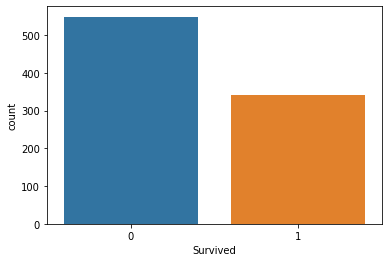

In [134]:
# lets view the response variable

sns.countplot(x='Survived', data=titanic)
print(titanic['Survived'].value_counts())

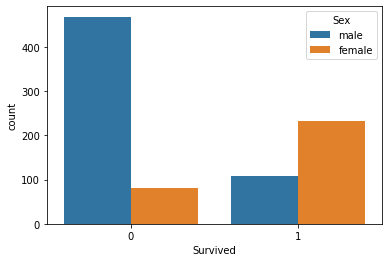

In [135]:
# We will visualise the response variable by sex
sns.countplot(x='Survived', hue='Sex', data=titanic)

Most of the people who did not survive are male and most of the people who survived are females

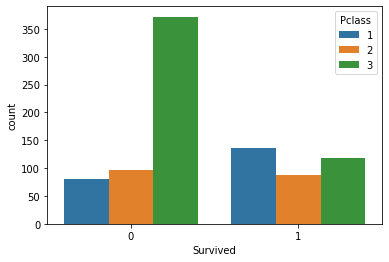

In [136]:
# We will visualise the response variable by Pclass
sns.countplot(x='Survived', hue='Pclass', data=titanic)

Most of the people who did not survive, belongs to class 3 of passenger class and majority of survivor belonged to 
higher classes

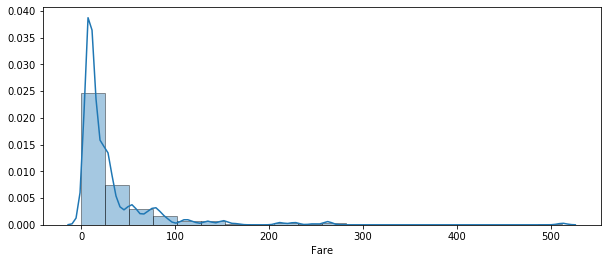

In [137]:
# Lets visualise the Fare variable distribution

plt.figure(figsize=(10, 4))
sns.distplot(titanic['Fare'], hist_kws=dict(edgecolor='k', linewidth=1), bins=20)

we see most of the passengers paid fares at the low end, which explains the large number of class-3 
passengers

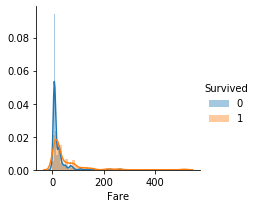

In [138]:
# Now if we observe this variable by our response variable
g = sns.FacetGrid(data=titanic, hue='Survived')
g.map(sns.distplot, 'Fare').add_legend()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


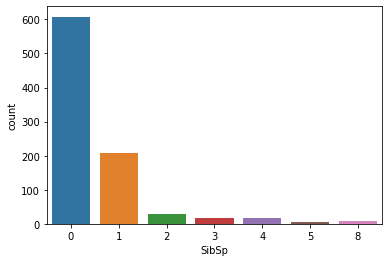

In [139]:
# Lets study the spouse-sibling variable/attribute
sns.countplot(x='SibSp', data=titanic)
print(titanic['SibSp'].value_counts())

It is observed that most of the passengers were travelling alone and in second few were travelling with just
one co-passenger, possibly spouse. Very few were travelling with children

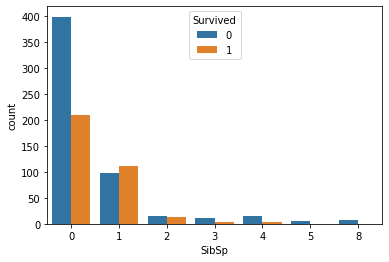

In [140]:
# We can study the sibling variable by survival

sns.countplot(x='SibSp', hue='Survived', data=titanic)

### Data Preparation

Lets check for presence of null values in the dataset

In [141]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

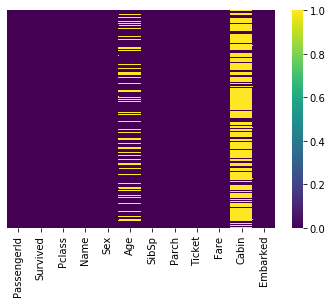

In [142]:
# We can also use a heatmap to visualise the missing data
sns.heatmap(titanic.isnull(), yticklabels=False, cmap='viridis')

We see around 20% of the age data have missing values and way too many data is missing for Cabin values

#### Data preparation and treatment of missing values

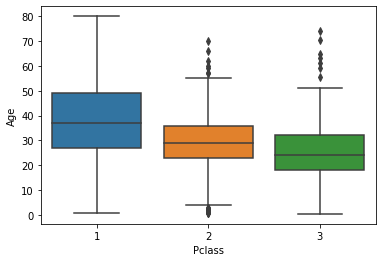

In [143]:
# First we will deal with age variable and for the same we will take the help pf Pclass

sns.boxplot(x='Pclass', y='Age', data=titanic)

In [144]:
# For every class, let us determine the average age

print("Average age Pclass -1 ")
print(int(titanic[titanic['Pclass'] == 1]['Age'].mean()))
print("Average age Pclass -2 ")
print(int(titanic[titanic['Pclass'] == 2]['Age'].mean()))
print("Average age Pclass -3 ")
print(int(titanic[titanic['Pclass'] == 3]['Age'].mean()))

Average age Pclass -1 
38
Average age Pclass -2 
29
Average age Pclass -3 
25


In [147]:
# function to impute the missing values and utilsing the function

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return int(titanic[titanic['Pclass'] == 1]['Age'].mean())
        elif Pclass == 2:
            return int(titanic[titanic['Pclass'] == 2]['Age'].mean())
        else:
            return int(titanic[titanic['Pclass'] == 3]['Age'].mean())
    else:
        return Age

titanic['Age'] = titanic[['Age', 'Pclass']].apply(impute_age, axis=1)

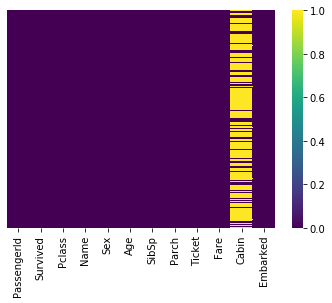

In [148]:
# Now we will re-run the heatmap to visualise
sns.heatmap(titanic.isnull(), yticklabels=False, cmap='viridis')

We see there are no missing values in Age

In [149]:
# The Cabin has way too many missing values to be of any use even imputed. Hence dropping the column

titanic.drop('Cabin', axis=1, inplace=True)

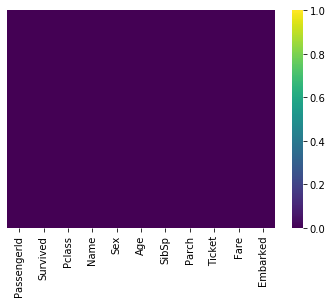

In [150]:
# Now we will re-run the heatmap to visualise
sns.heatmap(titanic.isnull(), yticklabels=False, cmap='viridis')

In [151]:
# Revised structure of the data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [152]:
# for columns SEX and Embarked, we would create dummy variables
# we would just use one of the dummy variable, because the other will be perfectly correlated with other(s)

sex = pd.get_dummies(titanic['Sex'], drop_first=True)
embarked = pd.get_dummies(titanic['Embarked'], drop_first=True)

# Now we will add these columns and drop the original ones
titanic = pd.concat([titanic, sex, embarked], axis=1)
titanic.drop(['Sex', 'Embarked'], axis=1, inplace=True)

# Check the revised structure and data
titanic.info()

titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
male           891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
dtypes: float64(2), int64(5), object(2), uint8(3)
memory usage: 65.4+ KB


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [153]:
# Columns like Name and Ticket is also not needed for modelling
# PassengerId column is also a sequence number and not very useful for any modelling. Hence dropping that
# column as well
titanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

titanic.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Train, test split

In [154]:
from sklearn.model_selection import train_test_split

features = titanic.drop('Survived', axis=1)
target = titanic['Survived']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3,
                                                                           random_state=101)

### Model Logistic regression

In [155]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(features_train, target_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

#### Check the predictions and model validations

In [156]:
predictions = model.predict(features_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Run the diagnostics
print("Confusion Matrix")
print(confusion_matrix(target_test, predictions))
print("\n")
print("Accuracy Score")
print(accuracy_score(target_test, predictions))
print("\n")
print("Classification Report")
print(classification_report(target_test, predictions))

Confusion Matrix
[[133  21]
 [ 40  74]]


Accuracy Score
0.7723880597014925


Classification Report
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.78      0.65      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



We get 77% accuracy on predictions

### We will test this model out on the given titanic test data 

In order to do so, we will consider the original titatic dataset as train and load the subsequent test dataset

In [168]:
# Lets load the test dataset first
titanic_test = pd.read_csv("/Users/suvosmac/OneDrive/Documents/ML-Datasets/ML-Bootcamp/titanic_test.csv")

# Check the load
titanic_test.info()

# Check the initial rows
titanic_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [169]:
# lets check for missing values in the dataset
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [170]:
# Treating missing values in age
titanic_test['Age'] = titanic_test[['Age', 'Pclass']].apply(impute_age, axis=1)

titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [171]:
# for columns SEX and Embarked, we would create dummy variables
# we would just use one of the dummy variable, because the other will be perfectly correlated with other(s)

sex = pd.get_dummies(titanic_test['Sex'], drop_first=True)
embarked = pd.get_dummies(titanic_test['Embarked'], drop_first=True)

# Adding these columns back to the dataset
titanic_test = pd.concat([titanic_test, sex, embarked], axis=1)

# dropping the columns not needed for modelling
titanic_test.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

# Check the final prepared test data
titanic_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [175]:
# Final Check for null values
titanic_test.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      1
male      0
Q         0
S         0
dtype: int64

In [177]:
# We see there is a null value in Fare.. substituting it with the average

titanic_test['Fare'].fillna(titanic_test['Fare'].mean(), inplace=True)

# Check whether no more missing values are left
titanic_test.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
male      0
Q         0
S         0
dtype: int64

In [180]:
# Now we will use the model to run predictions on this dataset
predictions = model.predict(titanic_test)

# Adding the survival predictions to the original test dataset
titanic_test['Survived'] = predictions

titanic_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
0,3,34.5,0,0,7.8292,1,1,0,0
1,3,47.0,1,0,7.0000,0,0,1,0
2,2,62.0,0,0,9.6875,1,1,0,0
3,3,27.0,0,0,8.6625,1,0,1,0
4,3,22.0,1,1,12.2875,0,0,1,1


### Alternate approach of Logistic Regression

In [182]:
import statsmodels.api as sm

# We will run the logit model

logit = sm.Logit(target_train, features_train)
# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.475202
         Iterations 6


In [187]:
# View the results summary
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      615
Method:                           MLE   Df Model:                            7
Date:                Wed, 28 Aug 2019   Pseudo R-squ.:                  0.2765
Time:                        16:19:06   Log-Likelihood:                -296.05
converged:                       True   LL-Null:                       -409.17
Covariance Type:            nonrobust   LLR p-value:                 3.119e-45
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.0524      0.102      0.516      0.606      -0.147       0.252
Age            0.0042      0.007      0.580      0.562      -0.010       0.018
SibSp         -0.2799      0.112     -2.506      0.0

we see only SibSp, Fare and male are statistically significant in making predictions, dropping other features
re-run the model

In [191]:
X_features = titanic[['SibSp', 'Fare', 'male']]
y = titanic['Survived']

X_features_train, X_features_test, y_train, y_test = train_test_split(X_features, y, test_size = 0.3,
                                                                     random_state = 101)

logit = sm.Logit(y_train, X_features_train)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.479839
         Iterations 6


In [193]:
print(result.summary())

# Confidence interval gives you an idea for how robust the coefficients of the model are
print (result.conf_int())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      620
Method:                           MLE   Df Model:                            2
Date:                Wed, 28 Aug 2019   Pseudo R-squ.:                  0.2694
Time:                        18:06:10   Log-Likelihood:                -298.94
converged:                       True   LL-Null:                       -409.17
Covariance Type:            nonrobust   LLR p-value:                 1.339e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
SibSp         -0.2587      0.095     -2.716      0.007      -0.445      -0.072
Fare           0.0217      0.003      6.527      0.000       0.015       0.028
male          -2.0883      0.164    -12.752      0.0

For example we see that there is an inverse relationship between being a male and probability
of Survival. The chances of Survival goes down if the passenger is a male.
There is a positive relationship between Fare and Survival - Higher fare, higher chances of survival
There is an inverse relationship between having Siblings/Spouse and Survival ...
More number of Siblings and Spouse, lesser is the chance of passenger survival

In [194]:
# Lets inspect the odds ratio which will tell us how a 1 unit 
# increase or decrease in a variable affects the odds of Survival.

print(np.exp(result.params))

SibSp    0.772057
Fare     1.021923
male     0.123893
dtype: float64


In [195]:
# Now lets do the predictions and concat the result with the original dataset

survival_prob = result.predict(X_features_test)

X_features_test = pd.concat([X_features_test, survival_prob, y_test], axis=1)

X_features_test.rename(columns={0:'Survival Prob'}, inplace=True)

In [196]:
X_features_test.head()

,SibSp,Fare,male,Survival Prob,Survived
331,0,28.500,1,0.186901,0
700,1,227.525,0,0.990765,1
748,1,53.100,1,0.232278,0
751,0,12.475,1,0.139698,1
481,0,0.000,1,0.110236,0


The above has complete probability predictions as well as actuals

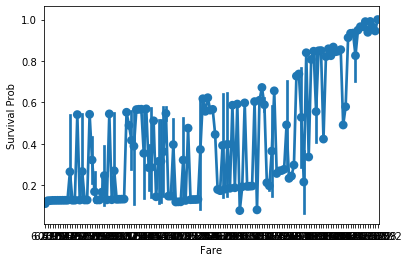

In [203]:
# Now we will run some visualizations on the probabilities
sns.pointplot(x='Fare', y='Survival Prob', data=X_features_test)

There is a slight chance that as the fare increases the probability of survival increases

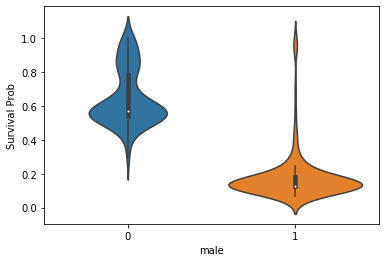

In [204]:
sns.violinplot(x='male', y='Survival Prob', data=X_features_test)

It is clear that male passengers have low probability of survival

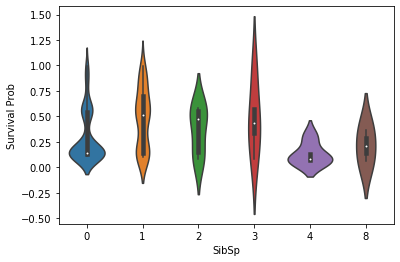

In [205]:
sns.violinplot(x='SibSp', y='Survival Prob', data=X_features_test)

More the number of siblings lesser is the change of survival for the passenger